In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
import pickle
import pathlib
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
%matplotlib inline


In [50]:
#Importing data
data_dir = '/Users/photon/Downloads/GTSRB'
train_path = '/Users/photon/Downloads/GTSRB/Train'
test_path = '/Users/photon/Downloads/GTSRB/'

In [51]:
# Number of Classes
IMG_HEIGHT = 30
IMG_WIDTH = 30
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

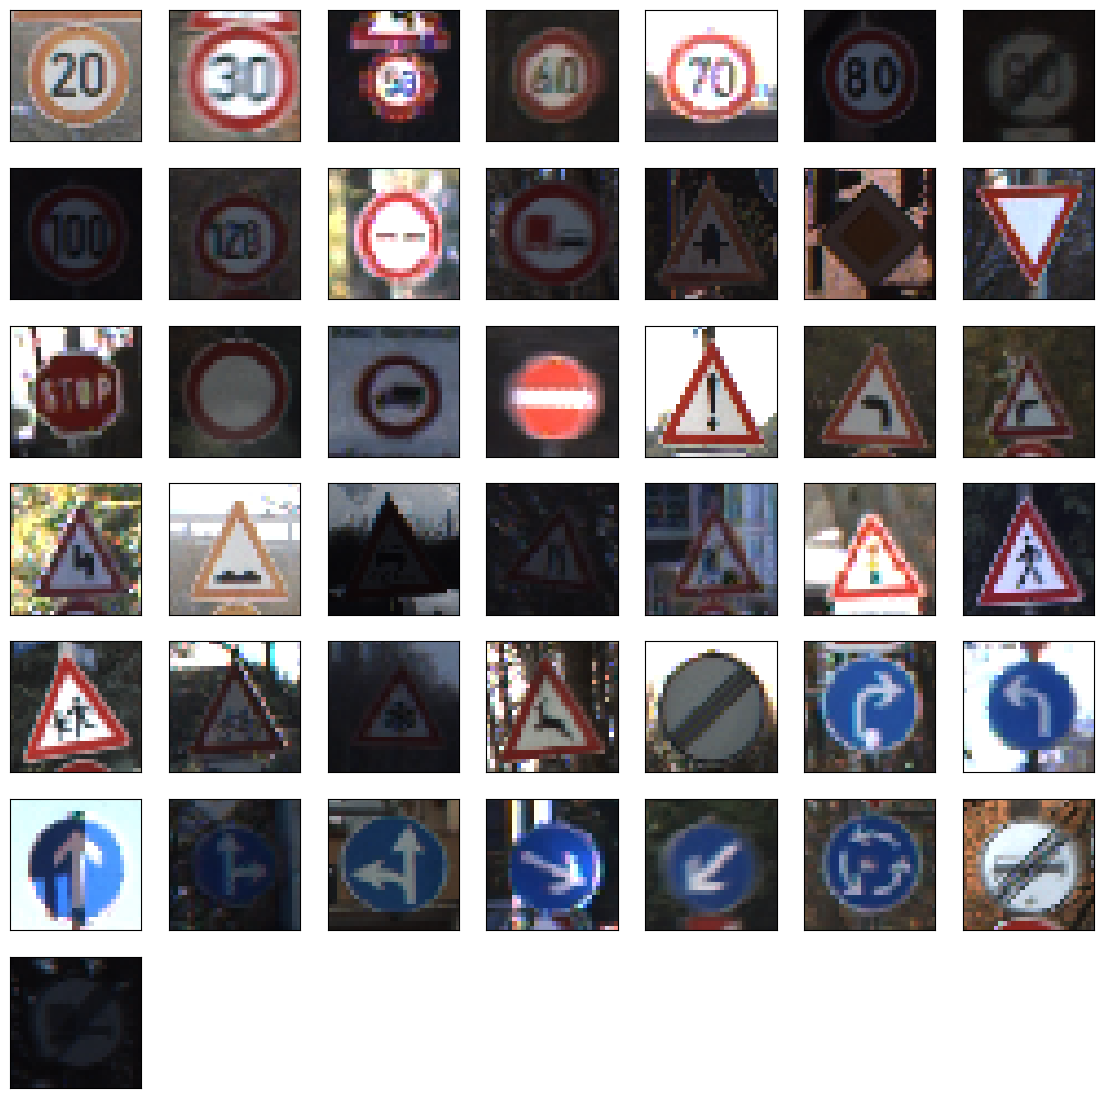

In [52]:
# Visualizing all the different Signs
# Define the path to your training images
img_dir = pathlib.Path(train_path)

# Set the size for the figure
plt.figure(figsize=(14, 14))

# Loop through each category
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i + 1)  # Create a subplot for each category
    plt.grid(False)  # Turn off the grid
    plt.xticks([])   # Remove x-ticks
    plt.yticks([])   # Remove y-ticks

    # Get the first image file from each category folder
    sign = list(img_dir.glob(f'{i}/*'))[0]

    # Load the image, ensuring it's resized to your specified dimensions
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))

    # Display the image
    plt.imshow(img)

# Display the plot
plt.show()

In [53]:
#Defining all the labels
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

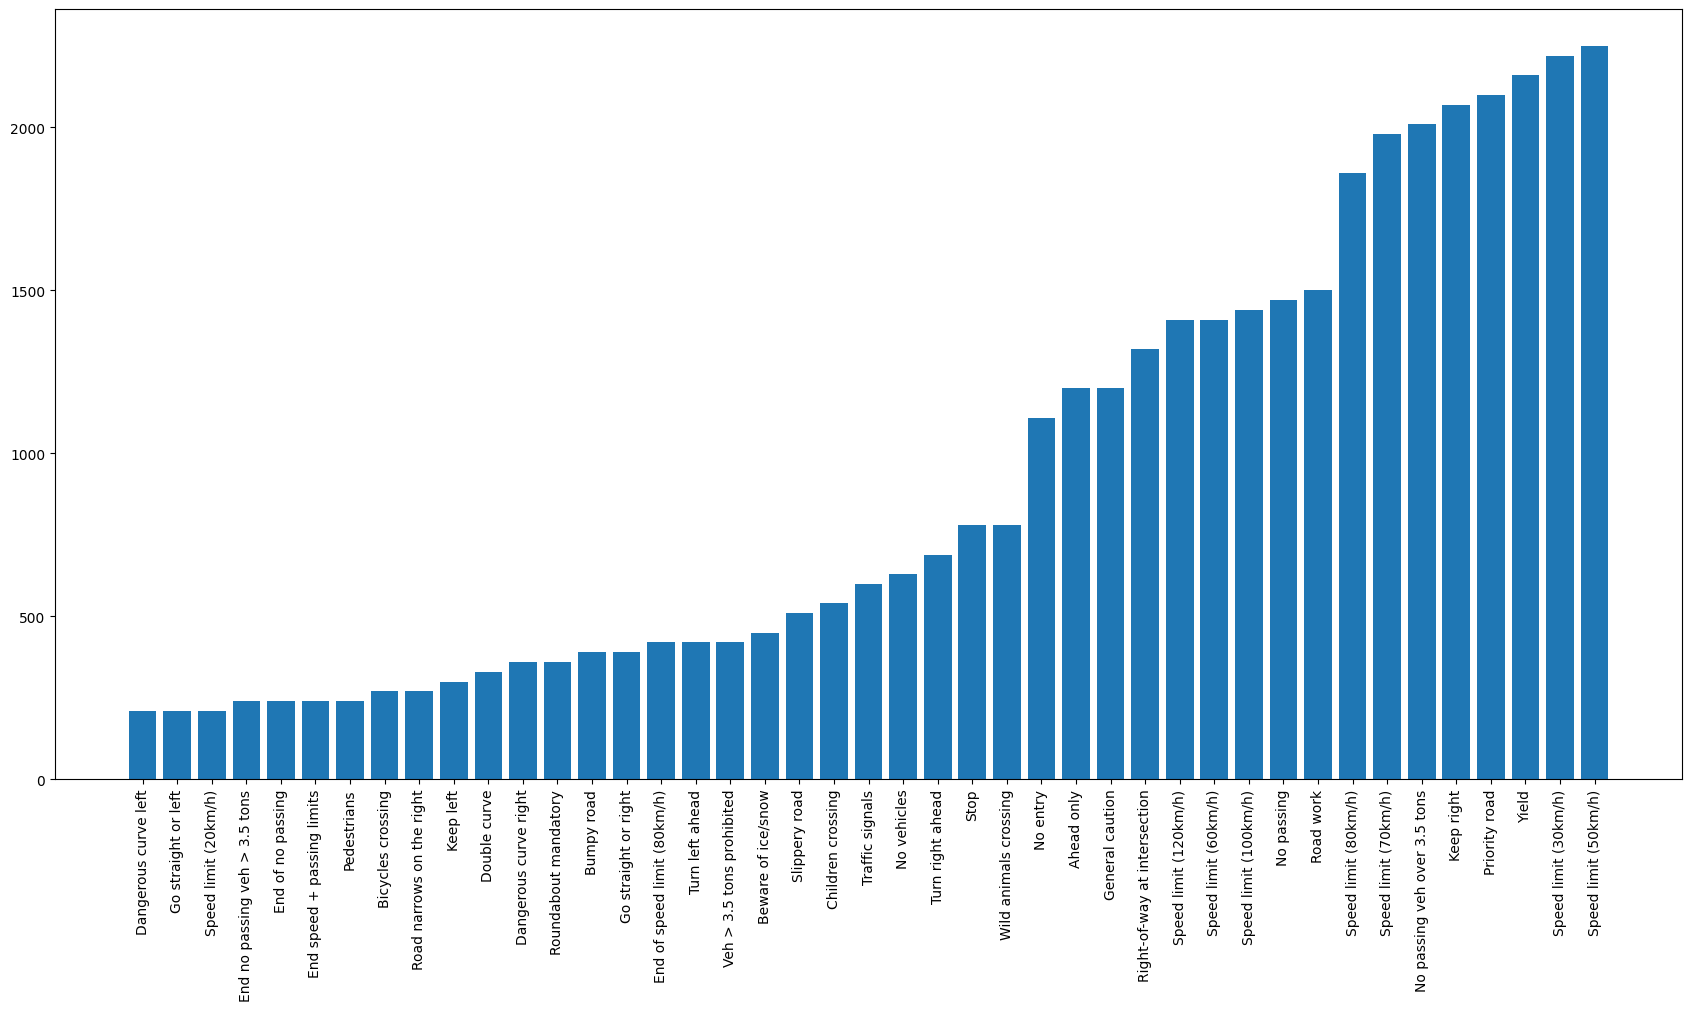

In [54]:
#Counting number of images in each class of training data
# List all folders in the training path
folders = os.listdir(train_path)

# Initialize lists to store the number of images and corresponding class names
train_number = []
class_num = []

# Iterate over each folder (each representing a class)
for folder in folders:
    # List all files in the current folder
    train_files = os.listdir(os.path.join(train_path, folder))
    
    # Append the count of files (images) to 'train_number'
    train_number.append(len(train_files))

    # Append the class name/number to 'class_num' (assuming 'classes' is a predefined list)
    class_num.append(classes[int(folder)])

# Create pairs of train number and class number, and sort them
sorted_pairs = sorted(zip(train_number, class_num))

# Unzip the sorted pairs into two separate lists
train_number, class_num = map(list, zip(*sorted_pairs))

# Plotting the number of images in each class using a bar chart
plt.figure(figsize=(21, 10))  
plt.bar(class_num, train_number)

# Set class numbers as x-ticks and rotate them for better readability
plt.xticks(class_num, rotation='vertical')

# Display the plot
plt.show()


Splitting the data into train and test data

In [55]:
#Load images and labels from a directory.
def load_data(data_dir):

    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [56]:
#labelling the images
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

Building the model

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout

# Define the model as a sequential model
model = Sequential()

# Adding the first convolutional layer with 32 filters, kernel size of 3, and 'relu' activation
# This layer also specifies the input shape (height, width, and depth of the input)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Adding a Max Pooling layer to reduce the spatial dimensions of the output volume
model.add(MaxPooling2D((2, 2)))

# Adding dropout to reduce overfitting by randomly setting a fraction of input units to 0 at each update
model.add(Dropout(0.25))

# Adding the second convolutional layer with 64 filters and a kernel size of 3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Repeating Max Pooling and Dropout for the second convolutional layer
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Adding the third convolutional layer with 64 filters and a kernel size of 3
model.add(Conv2D(64, (3, 3), activation='relu'))

# Display the model's architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

In [58]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

In [59]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [60]:
# Fitting the model
EPOCHS = 30
history = model.fit(x_train,  y_train, validation_data = (x_test, y_test),   epochs=EPOCHS,    steps_per_epoch=60
      )

Epoch 1/30
60/60 [==============================] - 5s 84ms/step - loss: 6.7979 - accuracy: 0.0441 - val_loss: 3.6326 - val_accuracy: 0.0989
Epoch 2/30
60/60 [==============================] - 4s 75ms/step - loss: 3.3840 - accuracy: 0.1234 - val_loss: 3.0703 - val_accuracy: 0.2515
Epoch 3/30
60/60 [==============================] - 5s 82ms/step - loss: 2.7680 - accuracy: 0.2715 - val_loss: 2.3451 - val_accuracy: 0.4070
Epoch 4/30
60/60 [==============================] - 5s 79ms/step - loss: 2.1004 - accuracy: 0.4078 - val_loss: 1.6834 - val_accuracy: 0.5352
Epoch 5/30
60/60 [==============================] - 5s 80ms/step - loss: 1.5577 - accuracy: 0.5350 - val_loss: 1.1580 - val_accuracy: 0.6705
Epoch 6/30
60/60 [==============================] - 5s 81ms/step - loss: 1.1771 - accuracy: 0.6408 - val_loss: 0.8573 - val_accuracy: 0.7657
Epoch 7/30
60/60 [==============================] - 5s 88ms/step - loss: 0.9105 - accuracy: 0.7233 - val_loss: 0.6115 - val_accuracy: 0.8382
Epoch 8/30
60

Testing the accuracy and visualising the predictions

In [61]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9803
test set accuracy:  98.0298399925232


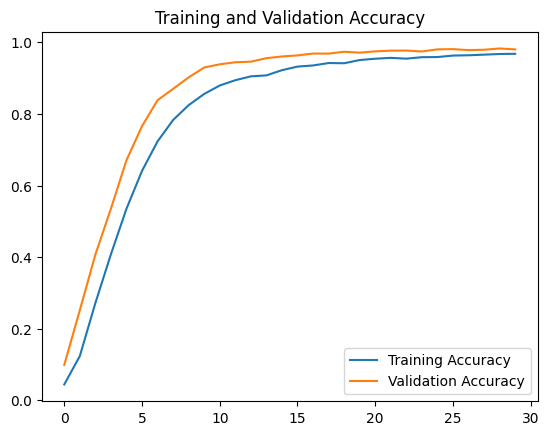

In [62]:
# Extracting accuracy and loss values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Generating a range object for the number of epochs
epochs_range = range(EPOCHS)

plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')  # Legend location

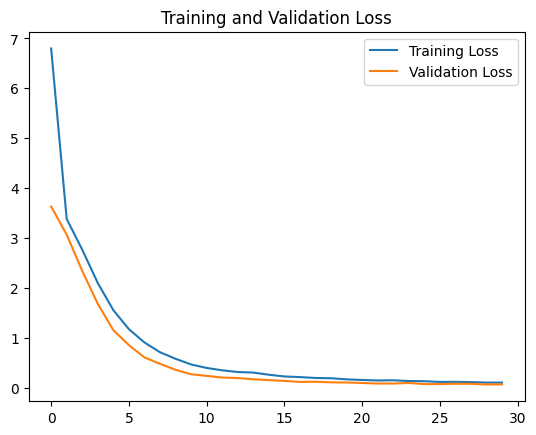

In [63]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')  # Legend location

In [64]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'X_test' is your test data and 'model' is your trained model
pred_probabilities = model.predict(X_test)
pred_classes = np.argmax(pred_probabilities, axis=1)

# Now, 'pred_classes' contains the class predictions for your test data

# If 'test_labels' is your true label data for the test set, you can calculate the accuracy
print('Test Data accuracy: ', accuracy_score(test_labels, pred_classes) * 100)


395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  92.57323832145686


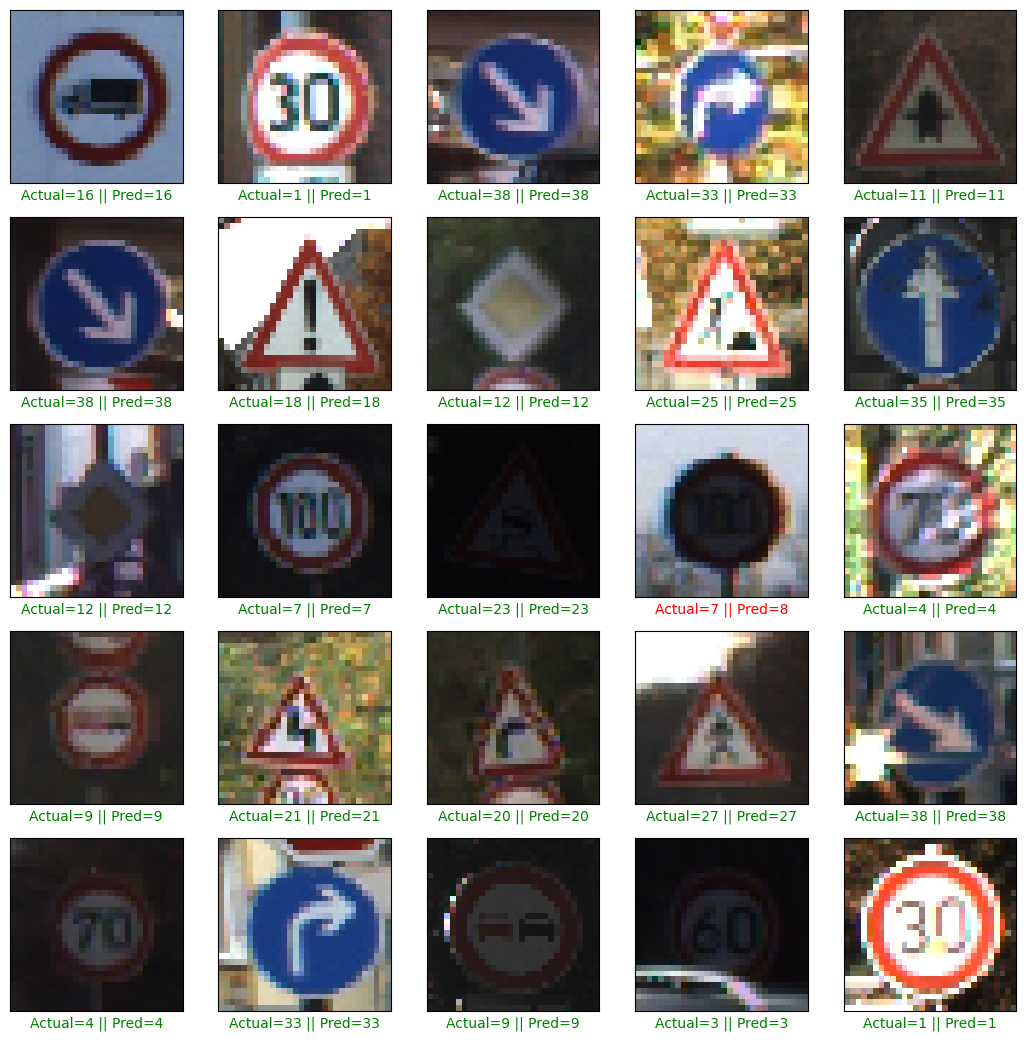

In [65]:
#Visualising Predictions
plt.figure(figsize=(13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # Getting the predicted class and the actual class
    prediction = pred_classes[start_index + i]
    actual = test_labels[start_index + i]
    
    col = 'g' if prediction == actual else 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color=col)
    plt.imshow(X_test[start_index + i])

plt.show()


In [66]:
# Save the model in the recommended Keras format
model.save('model.keras')